![alt text](Enunciado.png)

[[ 1. -1.  0. ...  0.  0.  0.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [ 0.  0.  0. ...  0. -1.  1.]]
[[ 1. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]

Autovalores λ (omega²):
[0.0000e+00 0.0000e+00 0.0000e+00 1.0000e-04 2.0000e-04 2.0000e-04
 4.0000e-04 5.0000e-04 6.0000e-04 8.0000e-04 1.0000e-03 1.2000e-03
 1.4000e-03 1.7000e-03 1.9000e-03 2.2000e-03 2.5000e-03 2.9000e-03
 3.2000e-03 3.6000e-03 3.9000e-03 4.4000e-03 4.8000e-03 5.2000e-03
 5.7000e-03 6.2000e-03 6.7000e-03 7.2000e-03 7.7000e-03 8.3000e-03
 8.9000e-03 9.5000e-03 1.0100e-02 1.0700e-02 1.1400e-02 1.2100e-02
 1.2800e-02 1.3500e-02 1.4200e-02 1.5000e-02 1.5800e-02 1.6600e-02
 1.7400e-02 1.8200e-02 1.9100e-02 2.0000e-02 2.0800e-02 2.1800e-02
 2.2700e-02 2.3700e-02 2.4600e-02 2.5600e-02 2.6600e-02 2.7700e-02
 2.8700e-02 2.9800e-02 3.0900e-02 3.2000e-02 3.3100e-02 3.4300e-

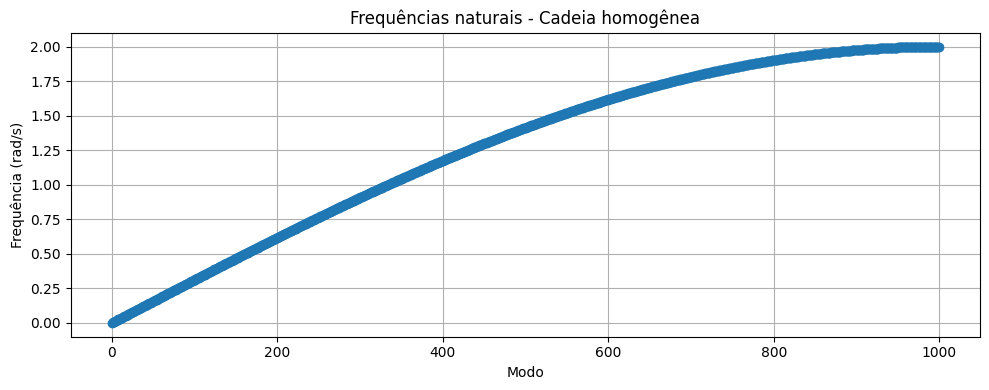

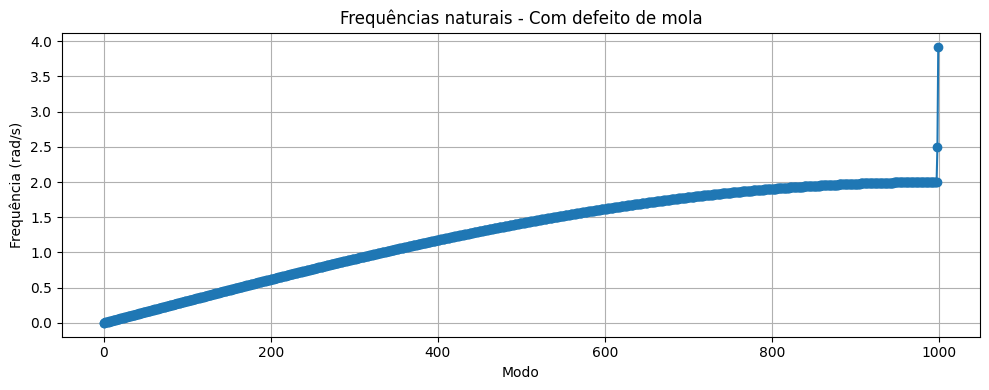

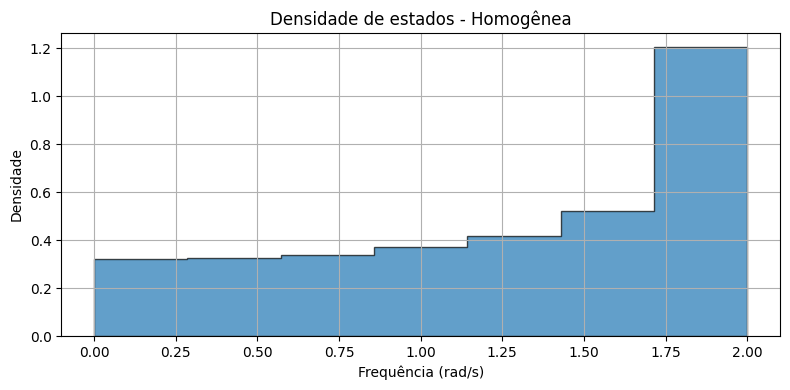

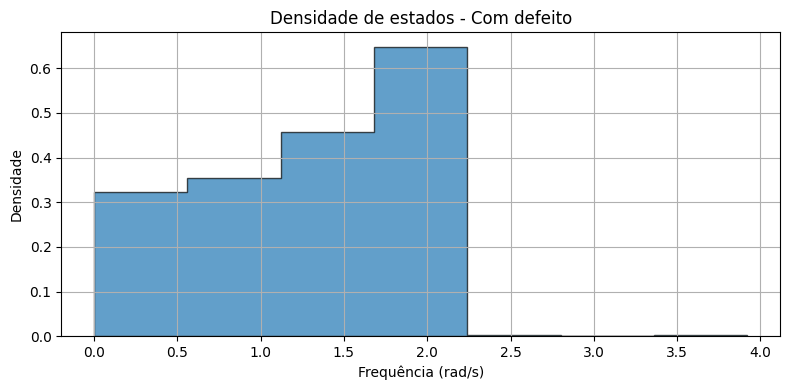

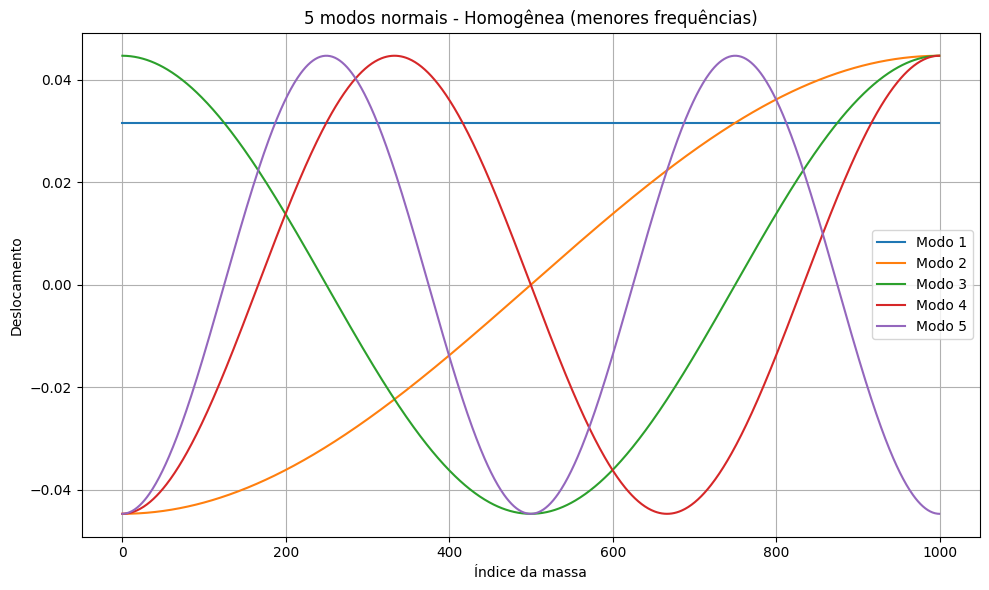

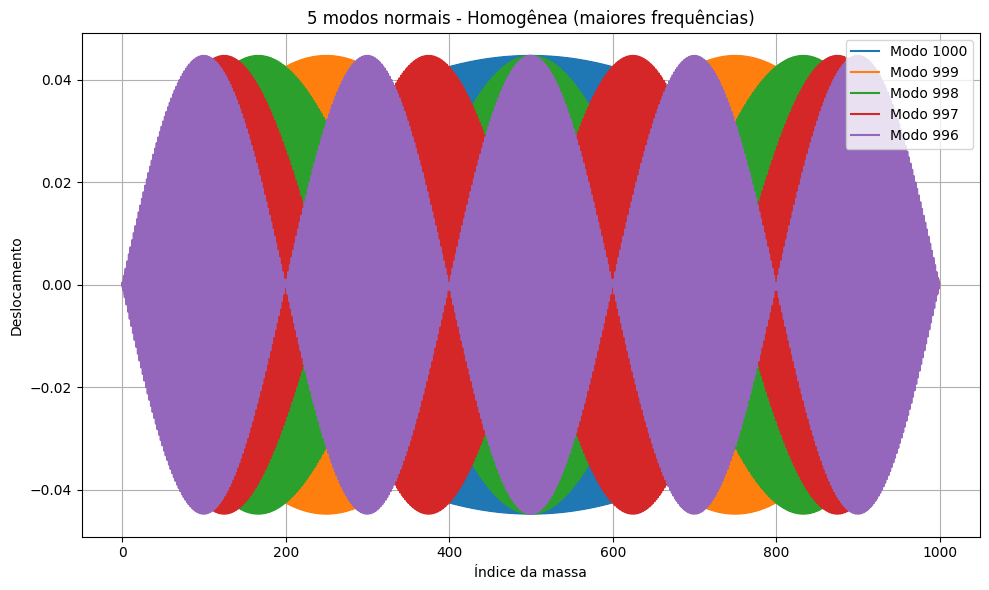

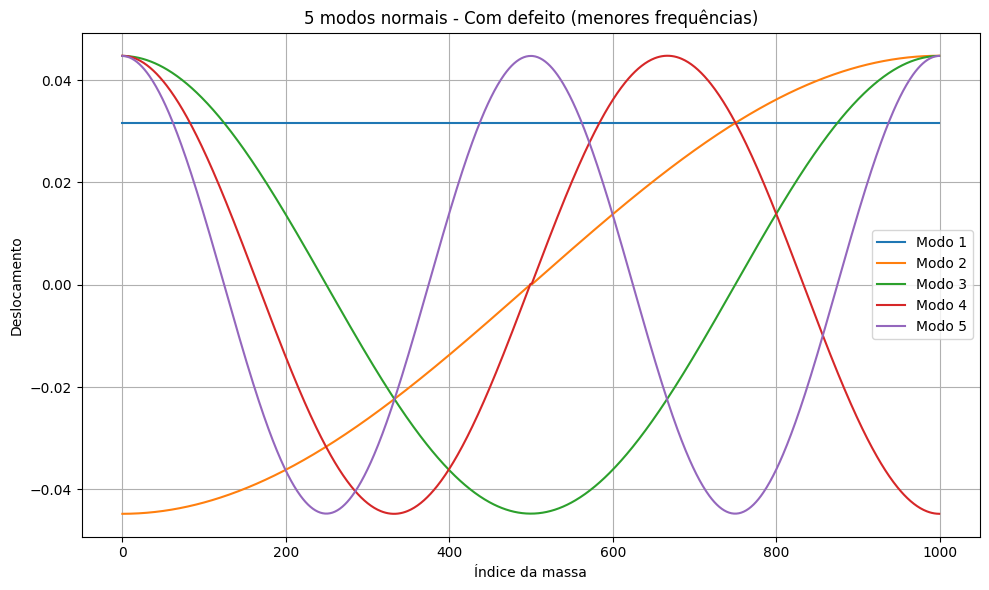

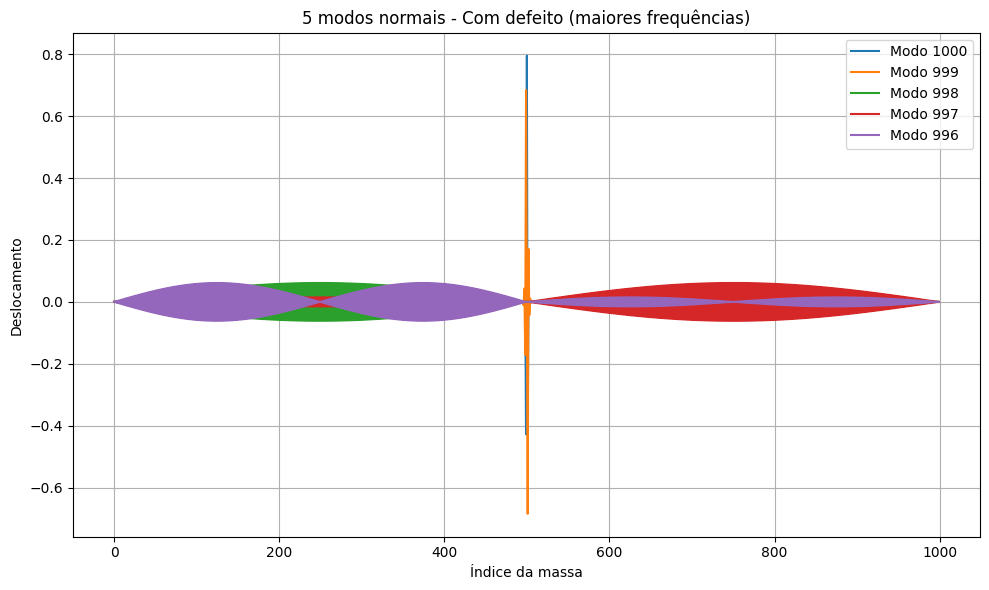

In [ ]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

# Parâmetros
N = 1000
m = 1.0
k = 1.0
k2 = 5.0
masses = np.ones(N) * m

def construir_D(k_values, masses):
    N = len(masses)
    D = np.zeros((N, N))
    for i in range(N):
        if i > 0:
            D[i, i] += k_values[i-1] / masses[i]
            D[i, i-1] = -k_values[i-1] / masses[i]
        if i < N - 1:
            D[i, i] += k_values[i] / masses[i]
            D[i, i+1] = -k_values[i] / masses[i]
    return D

# ---------- CASO 1: Homogêneo ----------
k_values_h = np.ones(N - 1) * k
D_h = construir_D(k_values_h, masses)
print(D_h)

eigvals_h, eigvecs_h = eig(D_h)
eigvals_h = np.real(eigvals_h)
eigvals_h[eigvals_h < 0] = 0
frequencias_h = np.sqrt(eigvals_h)
idx_h = np.argsort(frequencias_h)
frequencias_h = frequencias_h[idx_h]
eigvecs_h = np.real(eigvecs_h[:, idx_h])

print("\nAutovalores λ (omega²):")
print(np.round(eigvals_h[idx_h], 4))

print("\nAutovetor:")
print(np.round(eigvecs_h, 4))  

# ---------- CASO 2: Com defeito ----------
k_values_d = np.ones(N - 1) * k
center = N // 2
k_values_d[center - 1] = k2
k_values_d[center] = k2
D_d = construir_D(k_values_d, masses)

eigvals_d, eigvecs_d = eig(D_d)
eigvals_d = np.real(eigvals_d)
eigvals_d[eigvals_d < 0] = 0
frequencias_d = np.sqrt(eigvals_d)
idx_d = np.argsort(frequencias_d)
frequencias_d = frequencias_d[idx_d]
eigvecs_d = np.real(eigvecs_d[:, idx_d])

print("\nAutovalores com defeito λ (omega²):")
print(np.round(eigvals_d[idx_d], 4))

print("\nAutovetor com defeito:")
print(np.round(eigvecs_d, 4))  

# ---------- PLOTS DE FREQUÊNCIA ----------
plt.figure(figsize=(10, 4))
plt.plot(frequencias_h, 'o-', label='Homogênea')
plt.title('Frequências naturais - Cadeia homogênea')
plt.xlabel('Modo')
plt.ylabel('Frequência (rad/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(frequencias_d, 'o-', label='Com defeito')
plt.title('Frequências naturais - Com defeito de mola')
plt.xlabel('Modo')
plt.ylabel('Frequência (rad/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- HISTOGRAMAS ----------
plt.figure(figsize=(8, 4))
plt.hist(frequencias_h, bins=7, density=True, histtype='stepfilled',
         edgecolor='k', alpha=0.7)
plt.title('Densidade de estados - Homogênea')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Densidade')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(frequencias_d, bins=7, density=True, histtype='stepfilled',
         edgecolor='k', alpha=0.7)
plt.title('Densidade de estados - Com defeito')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Densidade')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- MODOS NORMAIS ----------
# Homogênea - 5 menores frequências
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(eigvecs_h[:, i], label=f'Modo {i+1}')
plt.title('5 modos normais - Homogênea (menores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Homogênea - 5 maiores frequências
plt.figure(figsize=(10, 6))
for i in range(1, 6):
    plt.plot(eigvecs_h[:, -i], label=f'Modo {N-i+1}')
plt.title('5 modos normais - Homogênea (maiores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Defeito - 5 menores frequências
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(eigvecs_d[:, i], label=f'Modo {i+1}')
plt.title('5 modos normais - Com defeito (menores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Defeito - 5 maiores frequências
plt.figure(figsize=(10, 6))
for i in range(1, 6):
    plt.plot(eigvecs_d[:, -i], label=f'Modo {N-i+1}')
plt.title('5 modos normais - Com defeito (maiores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()